In [15]:
import pandas as pd
import numpy as np
from sklearn import datasets
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt

### Data is acquired from "https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?resource=download"

In [2]:
df = pd.read_csv('toyota.csv')

In [38]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


### Since xgboost can not work with categorical data, dataset is cleaned by removing the categorical data columns

In [3]:
df_cleaned = df[['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']] 

#### Training the model with the whole dataset was not possible due to poor computer hardware, so the data is sliced

In [4]:
df_cleaned = df_cleaned[:500]

In [5]:
df_cleaned

,year,mileage,tax,mpg,engineSize,price
0,2016,24089,265,36.2,2.0,16000
1,2017,18615,145,36.2,2.0,15995
2,2015,27469,265,36.2,2.0,13998
3,2017,14736,150,36.2,2.0,18998
4,2017,36284,145,36.2,2.0,17498
...,...,...,...,...,...,...
495,2016,39039,20,55.4,2.5,21990
496,2020,1652,135,49.6,2.5,31790
497,2016,20553,125,60.1,2.0,15990
498,2016,32132,20,55.4,2.5,20790


### Data is split into train and test datasets.

In [6]:
y = df_cleaned['price']
X = df_cleaned[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### xgboost model is created and trained. While doing this, "https://towardsdatascience.com/explainable-ai-xai-a-guide-to-7-packages-in-python-to-explain-your-models-932967f0634b" is used

In [7]:
xgb_model=xgb.XGBClassifier(random_state=42) 
xgb_model=xgb_model.fit(X_train,y_train) 

### X_test dataset is given into the model and prediction is done

In [8]:
y_pred = xgb_model.predict(X_test)

### SHAP is used to explain the ML model

In [10]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

### Summary Dot Plot

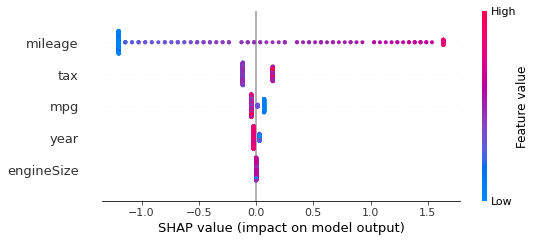

In [30]:
shap.summary_plot(shap_values[1], X,plot_type='dot')

### Summary Bar Plot

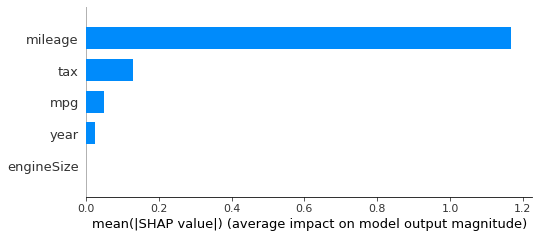

In [29]:
shap.summary_plot(shap_values[1], X,plot_type='bar')

### Dependence Plot

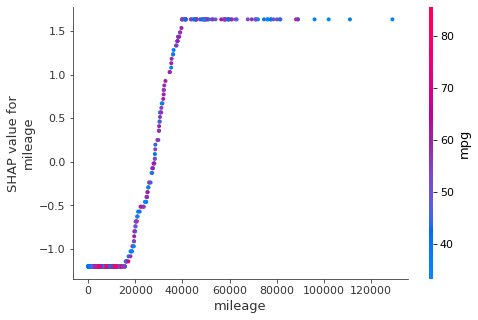

In [33]:
shap.dependence_plot("mileage", shap_values[1], X, interaction_index="mpg")

### Waterfall Plot

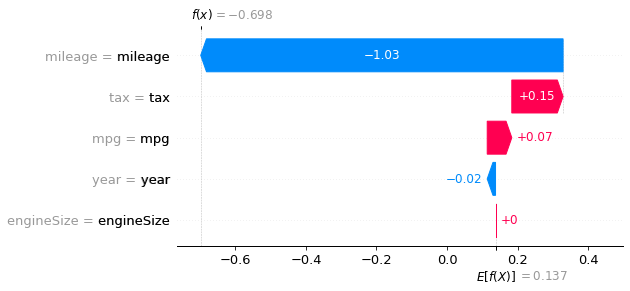

In [37]:
shap.plots._waterfall.waterfall_legacy(expected_value[1], shap_values[1][1], features=X.columns, feature_names=X.columns, max_display=15, show=True)